# POLYNOMIAL REGRESSION

### Objectives: 
To read data of fuel consumption and create a hypothesis model using scikit-learn.  
Test the model with test-train split method.  
Evaluate the performance using MSE(Mean Squared Error) metric.

#### IMPORTING NECESSARY PACKAGES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#### GET DATA AND ANALYZE

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
#Analyzing data of few features of data set
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


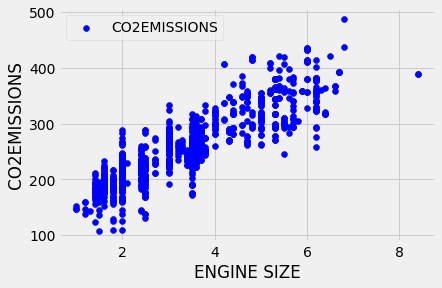

In [5]:
#Analysing CO2EMISSIONS dependency on ENGINESIZE USING A SCATTER PLOT
plt.style.use('fivethirtyeight')
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue', label='CO2EMISSIONS')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2EMISSIONS')
plt.grid(True)
plt.legend()
plt.show()

### Create Test/Train Dataset  
We split our dataset into train and test sets. Training set consists of 80% of dataset and Test set consists of 20%.  
We create a mask and select our data.

In [6]:
mark80 = int(len(df)*0.8)
train = cdf.loc[:mark80,:]
test = cdf.loc[mark80+1:,:]

### Polynomial Regression Model  

Suppose our hypothesis function varies quadratically with respect to ENGINESIZE(x).
We are modeling a equation $h(\theta) = \theta_1*x^2 + \theta_2*x + \theta_3$  
  
PolynomialFeatures() function in scikit-learn library derives new features from original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.  

fit_transform takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
feature_mat = poly.fit_transform(train_x)
feature_mat

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  2.5 ,  6.25]])

Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  𝑥  with  𝑥1 ,  𝑥21  with  𝑥2 , and so on. Then the degree 2 equation would be turn into $h(\theta) = \theta_1*x_2 + \theta_2*x_1 + \theta_0$  

Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression

In [20]:
regr = linear_model.LinearRegression()
regr.fit(feature_mat, train_y)

#Assuming hypothesis model(regr) as h_theta = theta_1*x + theta_0
print('theta_0: ', regr.coef_)
print('theta_1: ', regr.intercept_)

theta_0:  [[ 0.         45.53941677 -0.91187595]]
theta_1:  [116.62875656]


### Plot the hypothesis function

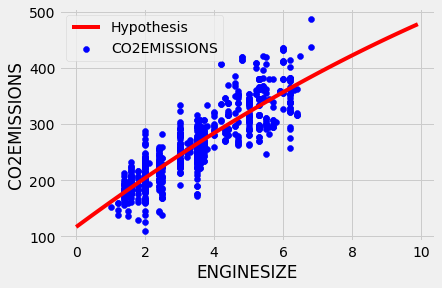

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue', label='CO2EMISSIONS')
XX= np.arange(0,10,0.1)
YY= regr.coef_[0][2]*np.power(XX,2) + regr.coef_[0][1]*XX + regr.intercept_[0]

plt.plot(XX, YY , color='red', label='Hypothesis')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

### Evaluating the model

In [24]:
from sklearn.metrics import r2_score

test_x = np.asarray(test[['ENGINESIZE']])
test_y = np.asarray(test[['CO2EMISSIONS']])
test_mat = poly.fit_transform(test_x)

h_theta = regr.predict(test_mat)

print('Mean Absolute Error : %.2f' % np.mean(np.absolute(h_theta - test_y)) )
print('Mean Squared Error : %.2f' %np.mean((h_theta - test_y)**2))
print('r2_score : %.2f' %r2_score(test_y, h_theta))

Mean Absolute Error : 20.34
Mean Squared Error : 718.15
r2_score : 0.79
